Investigating the error dues to offset from image plane.
-----------------------------------------------------------------

The conclusion is that the additive error in posiion on the detector due to an offset dx form the image plane has standard deviation

\sigma_a * dx * M

where M is magnification and \sigma_a the angular acceptance of the CRL. I.e the error is typically 100 times smaller than dx. So a 10 micron offset gives a 0.1 micron blurring which can be considered neglegible for mot cases.

In [1]:
import unittest
import matplotlib.pyplot as plt
import numpy as np
from darkmod.crl import CompundRefractiveLens
import sympy as sp

plt.style.use('dark_background')
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

In [2]:
number_of_lenses = 50
lens_space = 2000
lens_radius = 50
refractive_decrement = 1.65 * 1e-6
magnification = 10
crl = CompundRefractiveLens(number_of_lenses,
                            lens_space,
                            lens_radius,
                            refractive_decrement,
                            magnification)

In [3]:
# this is the setup of the crl at perfect imaging conditions
D1 = np.eye(2,2)
d1 = crl.d1
D1[0,1] = d1
D2 = np.eye(2,2)
D2[0,1] = crl.d2
M_N = crl.M_N

In [4]:
# let's say we are in a 50 micron box we investiaget the brodeing at the corner.
ys = 50
delta_x = 50

# we assume some resonable angular gaussian distirbution.
std = 0.000310427118005271
alphas = np.random.normal(0, std, size=(3000000,))

# we create some rays.
rays = np.array([np.ones(len(alphas))*ys, alphas])
D1[0,1] = d1 + delta_x

# propagate these to the detector
ray_final = (D2 @ M_N @ D1) @ rays
y = ray_final[0]



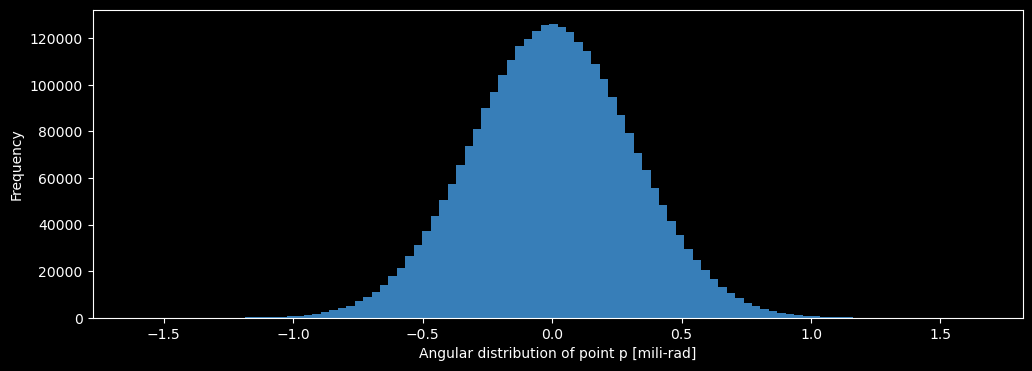

In [5]:
# lets see what the blurring looks like
plt.figure(figsize=(12,4))
plt.hist(alphas*1e3, bins=100, color=CB_color_cycle[0])
plt.xlabel('Angular distribution of point p [mili-rad]')
plt.ylabel('Frequency')
plt.show()


-500.0000420524362 500
0.15520679135855495 0.15521355900263548


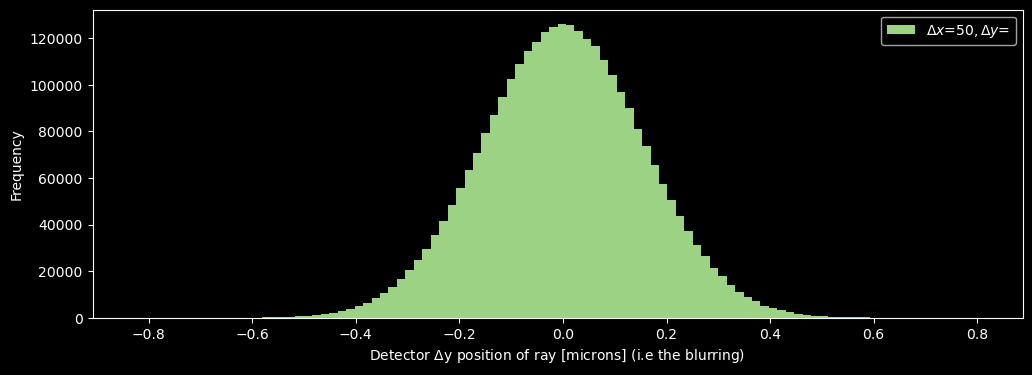

50 50


In [6]:
# lets see what the blurring looks like
plt.figure(figsize=(12,4))
plt.hist(y-y.mean(), bins=100, color=(156/255, 210/255, 131/255), label='$\Delta x$='+str(delta_x)+'$, \Delta y$='+str())
print(y.mean(), crl.magnification*ys)
print(y.std(), crl.magnification*std*delta_x)
plt.ylabel('Frequency')
plt.xlabel('Detector $\Delta$y position of ray [microns] (i.e the blurring)')
plt.legend()
plt.show()
print(delta_x, ys)


In [7]:
# we assume some resonable angular gaussian distirbution.
std = 0.000310427118005271
delta_xs = np.linspace(-100, 100, 200)
ystd = np.zeros_like(delta_xs)
ymean = np.zeros_like(delta_xs)
for i in range(len(delta_xs)):
    alphas = np.random.normal(0, std, size=(5000,))

    # we create some rays.
    rays = np.array([np.ones(len(alphas))*ys, alphas])
    D1[0,1] = d1 + delta_xs[i]
    # propagate these to the detector
    ray_final = (D2 @ M_N @ D1) @ rays
    ystd[i] = ray_final[0].std()
    ymean[i] =  ray_final[0].mean()

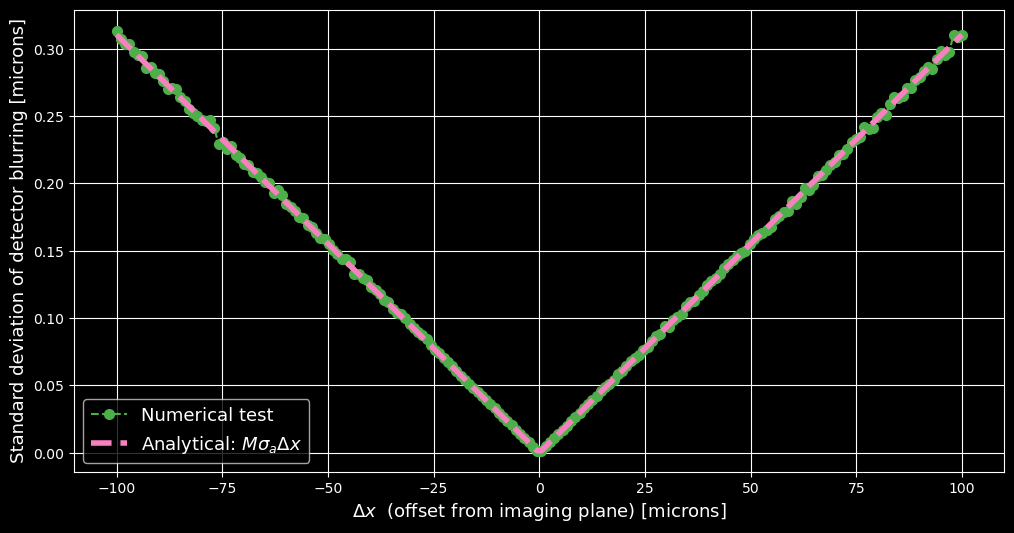

In [8]:
plt.figure(figsize=(12,6))
plt.plot(delta_xs, ystd, 'o--', color=CB_color_cycle[2], markersize=7, label='Numerical test')
plt.plot(delta_xs, crl.magnification*std*np.abs(delta_xs), '--',linewidth=4, color=CB_color_cycle[3], label='Analytical: $M\sigma_a\Delta x$')
plt.xlabel('$\Delta x$  (offset from imaging plane) [microns]', fontsize=13)
plt.ylabel('Standard deviation of detector blurring [microns]', fontsize=13)
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

In [9]:
# we assume some resonable angular gaussian distirbution.
std = 0.000310427118005271
delta_xs = np.linspace(-1.5, 1.5, 200) + 50
ypos = np.zeros_like(delta_xs)

alpha = std
for i in range(len(delta_xs)):

    # we create some rays.
    rays = np.array([ys, alpha])
    D1[0,1] = d1 + delta_xs[i]
    # propagate these to the detector
    ray_final = (D2 @ M_N @ D1) @ rays
    ypos[i] =  ray_final[0]


0.31042711800527095


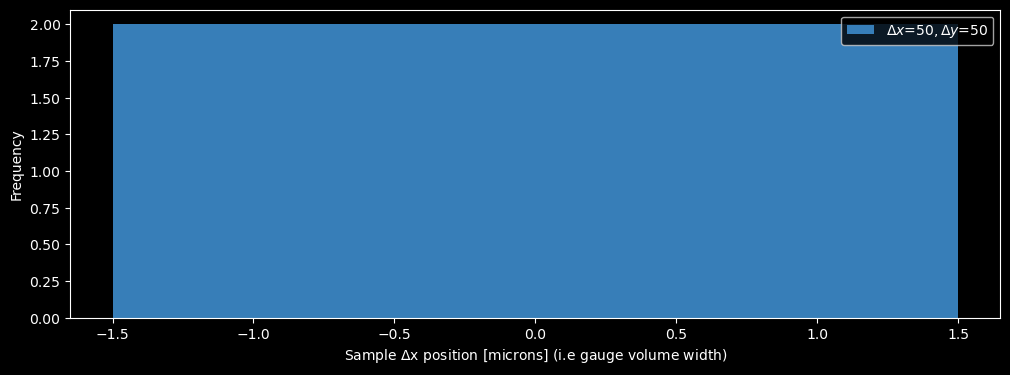

50 50


In [10]:
# lets see what the blurring looks like
plt.figure(figsize=(12,4))
plt.hist(delta_xs-np.mean(delta_xs), bins=100, color=CB_color_cycle[0], label='$\Delta x$='+str(delta_x)+'$, \Delta y$='+str(ys))
print(crl.magnification*alpha*100)
plt.ylabel('Frequency')
plt.xlabel('Sample $\Delta$x position [microns] (i.e gauge volume width)')
plt.legend()
plt.show()
print(delta_x, ys)

0.31042711800527095


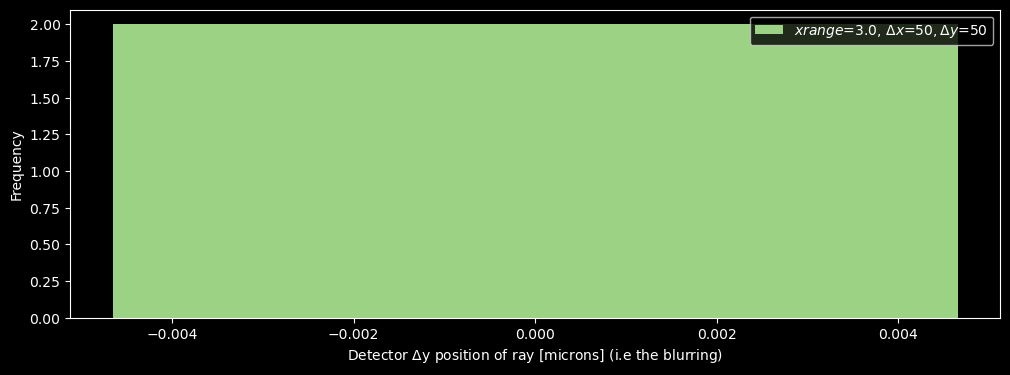

50 50


In [11]:
# lets see what the blurring looks like
plt.figure(figsize=(12,4))
plt.hist((ypos-ypos.mean()), bins=100, color=(156/255, 210/255, 131/255), label='$x range$='+str(delta_xs.max()-delta_xs.min())+', $\Delta x$='+str(delta_x)+'$, \Delta y$='+str(ys))
print(crl.magnification*alpha*100)
plt.ylabel('Frequency')
plt.xlabel('Detector $\Delta$y position of ray [microns] (i.e the blurring)')
plt.legend()
plt.show()
print(delta_x, ys)


0.15521355900263548 65.33333333333333 14.0 0.15719012373675523
0.15521355900263548 16.333333333333332 7.0 0.15578554751457874
0.15521355900263548 0.08333333333333333 0.5 0.1552885614640936


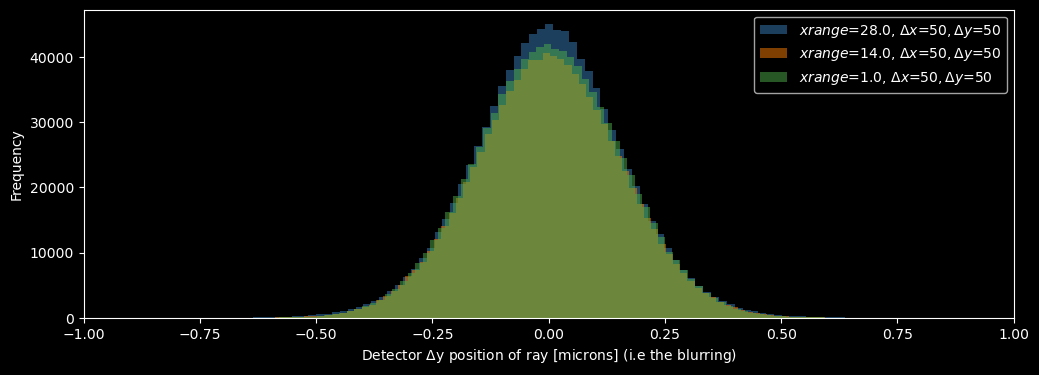

50 50


In [17]:
plt.figure(figsize=(12,4))

# we assume some resonable angular gaussian distirbution.
xranges = np.array([14, 7, 0.5])

for j,xrange in enumerate(xranges):
    std = 0.000310427118005271
    delta_xs = np.linspace(-xrange, xrange, 200) + 50
    ystd = np.zeros_like(delta_xs)
    ymean = np.zeros_like(delta_xs)
    yall = np.zeros((len(delta_xs)*5000))
    k=0
    for i in range(len(delta_xs)):
        alphas = np.random.normal(0, std, size=(5000,))
        # we create some rays.
        rays = np.array([np.ones(len(alphas))*ys, alphas])
        D1[0,1] = d1 + delta_xs[i]
        # propagate these to the detector
        ray_final = (D2 @ M_N @ D1) @ rays
        ystd[i] = ray_final[0].std()
        ymean[i] =  ray_final[0].mean()
        yall[k:k+5000] = ray_final[0]
        k+=5000

    # lets see what the blurring looks like
    plt.hist(yall-yall.mean(), bins=100, color=CB_color_cycle[j], alpha=0.5, label='$x range$='+str(delta_xs.max()-delta_xs.min())+', $\Delta x$='+str(delta_x)+'$, \Delta y$='+str(ys))
    print(crl.magnification*delta_xs.mean()*std, (xrange**2)/3., xrange, yall.std())


plt.ylabel('Frequency')
plt.xlabel('Detector $\Delta$y position of ray [microns] (i.e the blurring)')
plt.xlim([-1,1])
plt.legend()
plt.show()
print(delta_x, ys)

In [55]:
# let us verify our analytical guess:

N, f, T, dx, y, alpha, M, da = sp.symbols('N f T dx y alpha M da')

r = sp.Matrix([y, alpha])

t2 = 1 - (T/(2*f))
t1 = sp.sqrt( 1 - (t2)**2 )
phi = sp.atan( t1 / t2 )

Nc = sp.cos(N * phi)
Ns = sp.sin(N * phi)
s = sp.sin(phi)

M_N = sp.Matrix([[Nc,             f*Ns*s],
                [-Ns / (s*f),    Nc    ]])

d2 = -(M + M_N[0, 0]) / M_N[1, 0]

d1 =  -(d2*M_N[1, 1] + M_N[0, 1]) / (M_N[0, 0] + d2*M_N[1, 0])

D2 = sp.Matrix([[1,    d2],
                [0,    1    ]])

D1 = sp.Matrix([[1,   d1],
                [0,   1    ]])

D1p = sp.Matrix([[1,   d1+dx],
                [0,   1    ]])


r1 = sp.Matrix([y, alpha])
r2 = sp.Matrix([y, alpha + da])

y1 = D2 * M_N * D1p * r1
y2 = D2 * M_N * D1p * r2

error1 = sp.simplify(y1[0] - sp.simplify(y2[0]))

# this error is due to different angles originating form smae point
display(error1)

r1 = sp.Matrix([y, alpha])
r2 = sp.Matrix([y, alpha])

y1 = D2 * M_N * D1 * r1
y2 = D2 * M_N * D1p * r2

# this error is due to different dx points but with the same angle
error2 = sp.simplify(y1[0] - sp.simplify(y2[0]))

display(error2)



M*da*dx

M*alpha*dx